# WeatherPy

---

### Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [47]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

### **<u>Requirement 1</u>:** Create Plots to Showcase the Relationship Between Weather Variables and Latitude

#### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [48]:
# Set the API base URL and your API key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... ({e})")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | bodo
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | sandnessjoen
Processing Record 6 of Set 1 | malabar
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | lemmer
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | magistral'nyy
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | vuktyl
Processing Record 13 of Set 1 | belmonte
Processing Record 14 of Set 1 | huarmey
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | kapuskasing
Processing Record 17 of Set 1 | kongolo
Processing Record 18 of Set 1 | twin falls
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | as sulayyil
Processing Record 21 of Set 1 | vorgashor
Processing Record 22 of Set 1 | margaret river
Processing Record 2

In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [50]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,19.45,61,40,6.69,US,1717952535
1,albany,42.6001,-73.9662,17.60,86,89,0.45,US,1717952450
2,bodo,67.2800,14.4050,17.02,48,0,6.17,NO,1717952946
3,west island,-12.1568,96.8225,26.99,78,40,2.57,CC,1717952834
4,sandnessjoen,66.0217,12.6316,19.29,55,0,4.63,NO,1717952946


In [51]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,19.45,61,40,6.69,US,1717952535
1,albany,42.6001,-73.9662,17.60,86,89,0.45,US,1717952450
2,bodo,67.2800,14.4050,17.02,48,0,6.17,NO,1717952946
3,west island,-12.1568,96.8225,26.99,78,40,2.57,CC,1717952834
4,sandnessjoen,66.0217,12.6316,19.29,55,0,4.63,NO,1717952946


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

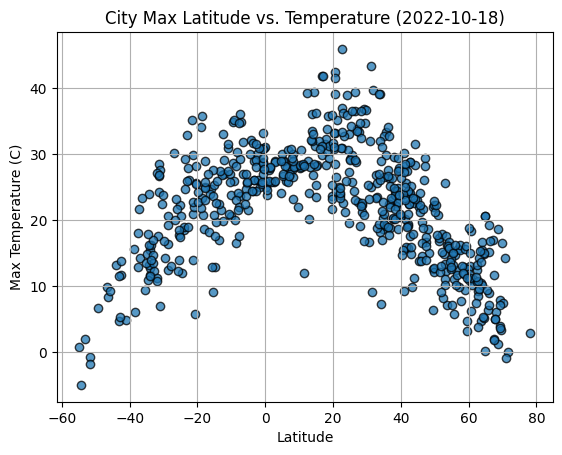

In [53]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', alpha=0.75)
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

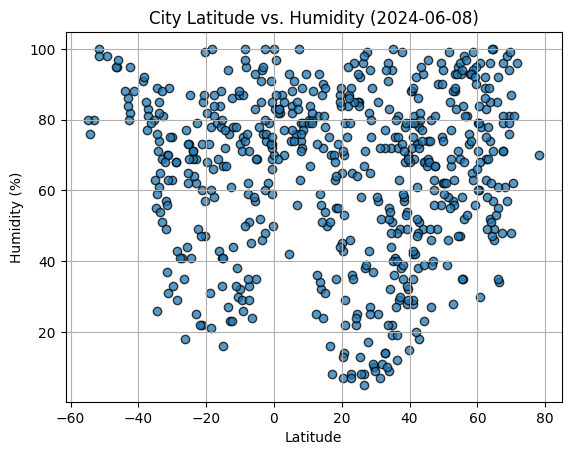

In [54]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', alpha=0.75)
plt.title("City Latitude vs. Humidity (2024-06-08)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

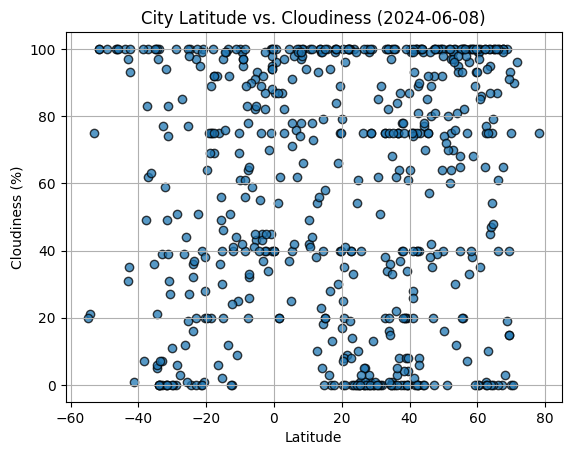

In [55]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', alpha=0.75)
plt.title("City Latitude vs. Cloudiness (2024-06-08)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

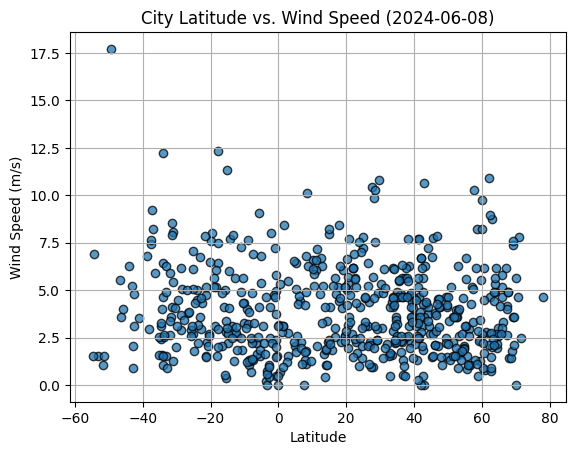

In [56]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', alpha=0.75)
plt.title("City Latitude vs. Wind Speed (2024-06-08)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## <u>Requirement 2</u>: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression_plot(x_values, y_values, x_label, y_label):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Create regression line
    regress_values = slope * np.array(x_values) + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolor='black', alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
       # Print the r-squared value
    print(f"r-squared: {r_value**2}")

    # Display the plot
    plt.show()

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,19.45,61,40,6.69,US,1717952535
1,albany,42.6001,-73.9662,17.60,86,89,0.45,US,1717952450
2,bodo,67.2800,14.4050,17.02,48,0,6.17,NO,1717952946
4,sandnessjoen,66.0217,12.6316,19.29,55,0,4.63,NO,1717952946
7,lemmer,52.8462,5.7091,14.97,57,70,3.58,NL,1717952915


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,west island,-12.1568,96.8225,26.99,78,40,2.57,CC,1717952834
5,malabar,-33.9667,151.2500,11.74,74,0,4.63,AU,1717952946
6,puerto natales,-51.7236,-72.4875,-0.75,100,100,1.03,CL,1717952796
8,avarua,-21.2078,-159.7750,21.03,60,40,1.54,CK,1717952775
10,bredasdorp,-34.5322,20.0403,11.02,89,5,2.40,ZA,1717952912


###  Temperature vs. Latitude Linear Regression Plot

r-squared: 0.5634448277245102


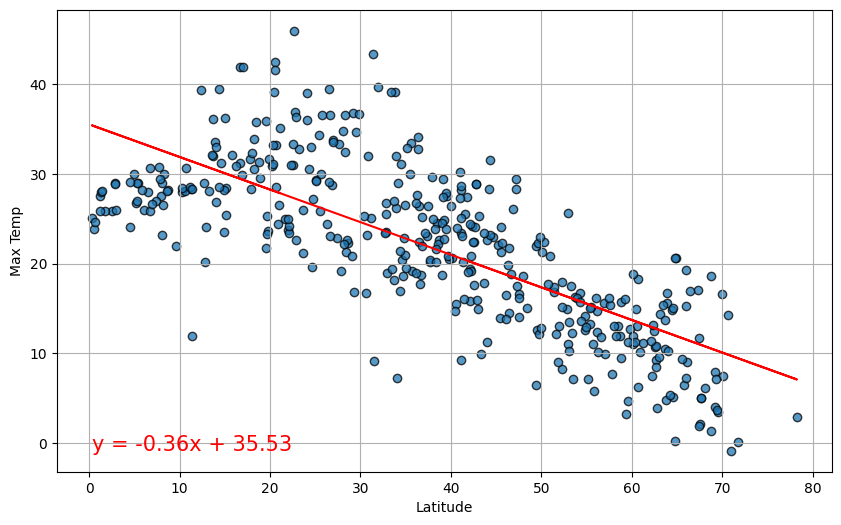

In [60]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# Example usage
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp")

r-squared: 0.5557318948429827


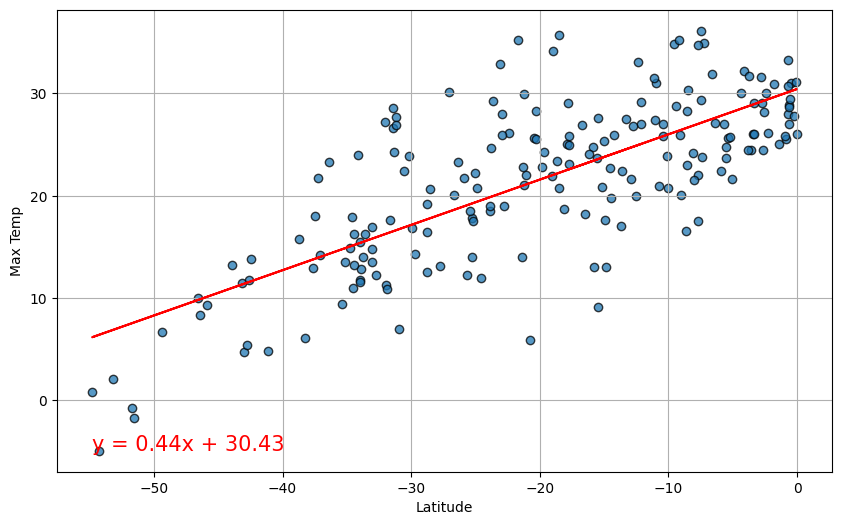

In [61]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:**
## Northern Hemisphere
1. **Negative Correlation**: There is a clear negative correlation between latitude and maximum temperature. As latitude increases, the maximum temperature tends to decrease. This is indicated by the downward slope of the red regression line.

2. **Regression Equation**: The equation of the regression line is \( y = -0.36x + 35.53 \). This means that for every degree increase in latitude, the maximum temperature decreases by 0.36 degrees Celsius. 

3. **R-squared Value**: The R-squared value is 0.563. This indicates that approximately 56.3% of the variance in the maximum temperature can be explained by the latitude. This suggests a moderate level of explanatory power for the linear model.

## Southern Hemisphere
- **Positive Correlation**: There is a positive correlation between latitude and maximum temperature, as indicated by the slope of the line of best fit ($ y = 0.44x + 30.43$).
- **Equatorial Increase**: As latitude approaches zero (the equator), the maximum temperature tends to increase.
- **Baseline Temperature**: The y-intercept suggests a significant baseline temperature ($ \approx 30.43^\circ C $) at the equator.


### Humidity vs. Latitude Linear Regression Plot

r-squared: 0.006881935699983236


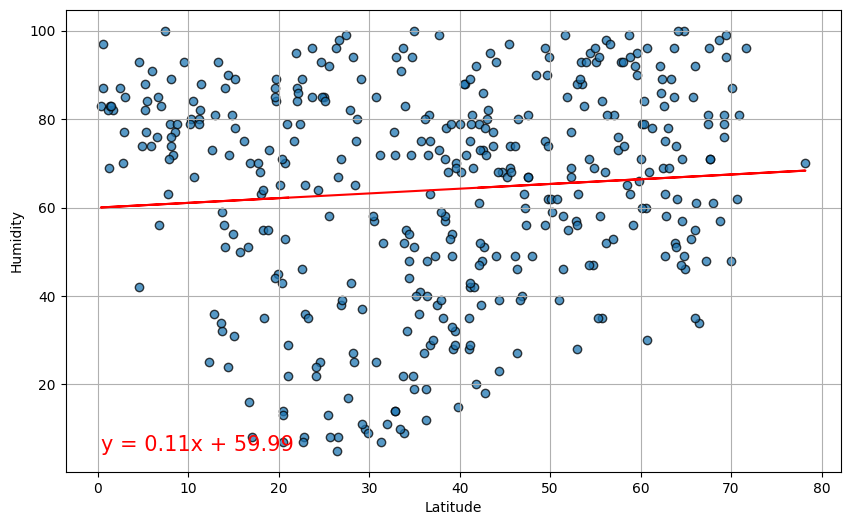

In [62]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")

r-squared: 0.025688830547223054


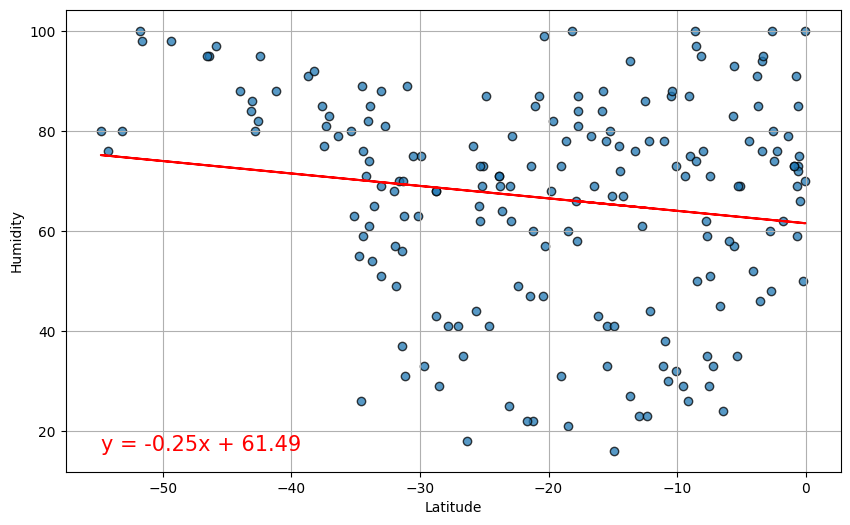

In [63]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:**
### Northern Hemishpere

- **Correlation**: The r-squared value is **0.006881935699983236**, indicating an extremely weak correlation between latitude and humidity.
- **Line Equation**: The equation of the line is $ y = 0.11x + 59.99 $, implying a slight increase in humidity with latitude.

Overall, the scatter plot suggests that there is no significant linear relationship between latitude and humidity within this dataset. The very low r-squared value supports this conclusion. The line equation shows that for every unit increase in latitude, there is an approximate increase of 0.11 units in humidity, starting at 59.99 when latitude is zero. However, this relationship is not strong enough to be considered significant.


### Southern Hemisphere

Based on the scatter plot graph with the regression line provided, here are the key conclusions:

- **Negative Correlation**: There is a slight negative correlation between latitude and humidity, indicated by the regression line equation $ y = -0.25x + 61.49 $.
- **Low Predictive Power**: The r-squared value of approximately 0.0256 suggests that latitude alone does not strongly predict humidity levels.
- **Other Influencing Factors**: The low r-squared value implies that other factors, besides latitude, significantly influence humidity levels.
- **Trend Observation**: Despite the weak correlation, the trend suggests that as one moves towards the equator (increasing latitude), humidity tends to decrease slightly. 


### Cloudiness vs. Latitude Linear Regression Plot

r-squared: 0.007099114760222758


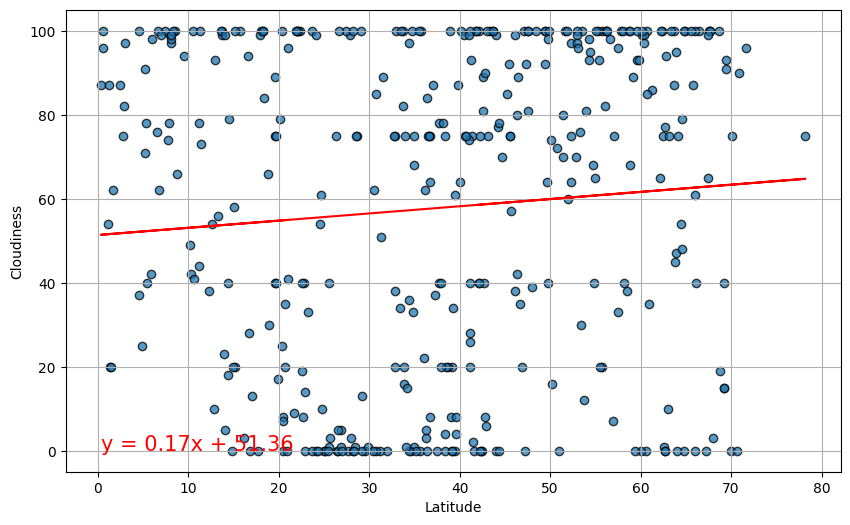

In [64]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

r-squared: 0.013935093520732847


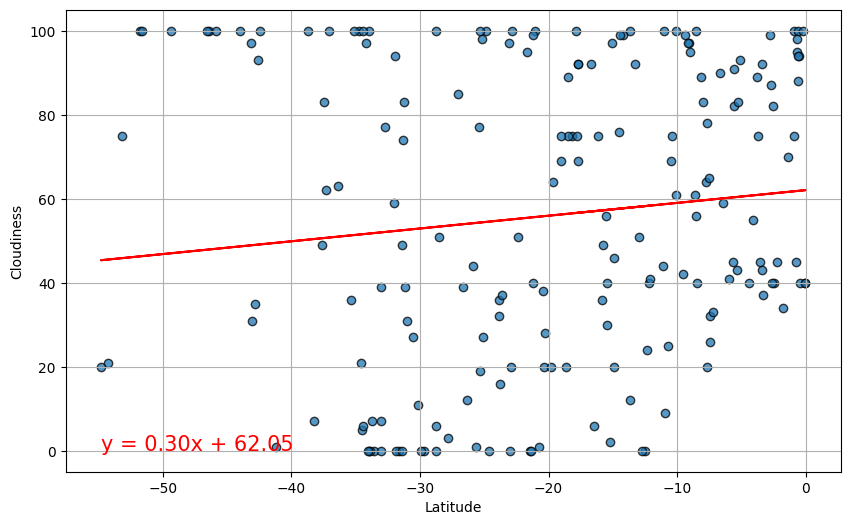

In [65]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:**

### Northern Hemisphere

- **Trend Line Equation**: The equation $ y = 0.17x + 51.36 $ suggests that for every unit increase in the x-variable, the y-variable increases by 0.17 units.
- **Correlation Strength**: The **r-squared** value is **0.0070**, which means only about **0.70%** of the variation in the y-variable can be explained by the x-variable.
- **Data Spread**: The blue dots are widely spread out, indicating a lot of variability that the linear model does not account for.
- **Potential Model Fit**: Given the low r-squared value, a linear model may not be the best fit for this data; other models or factors might better explain the relationship.


### Southern Hemishpere

- **Weak Correlation**: The \( R^2 \) value of **0.0139** suggests a very weak correlation between latitude and cloudiness.
- **Geographical Implication**: This could imply that locations closer to the equator (latitude closer to 0) may experience higher cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

r-squared: 0.00300967712272458


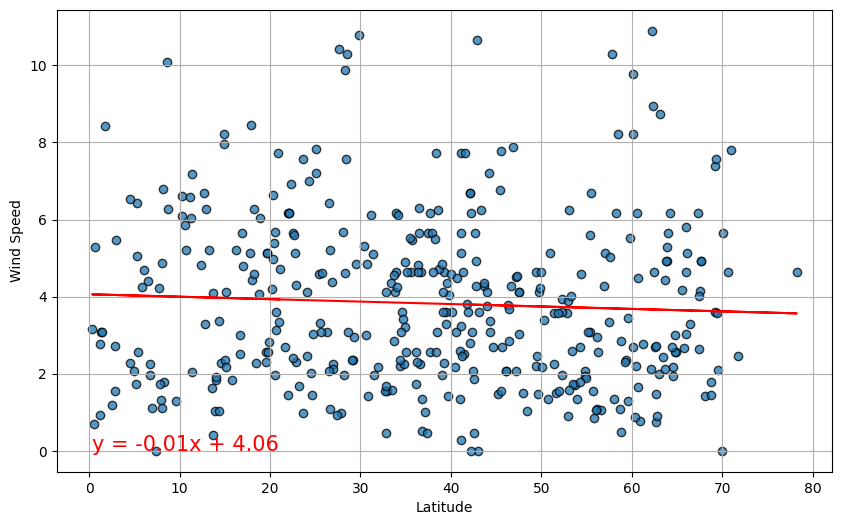

In [66]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

r-squared: 0.0457471966207267


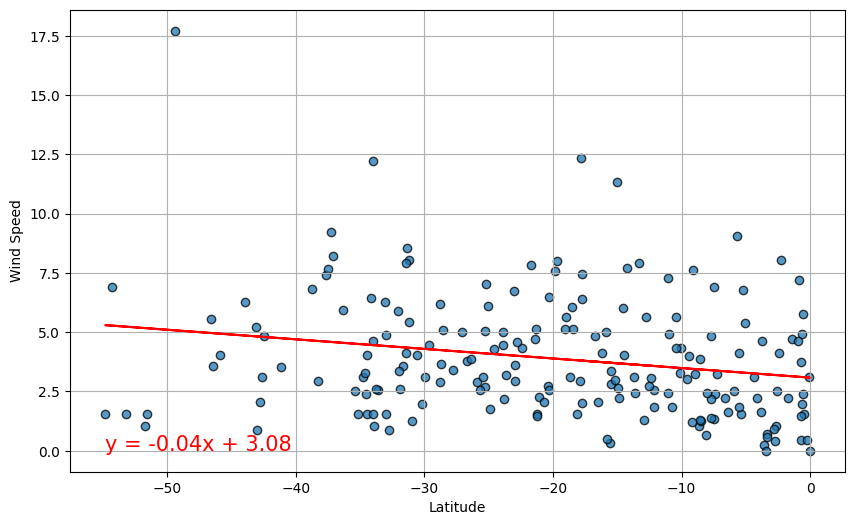

In [67]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:**

### Northern Hemisphere

- **No Significant Correlation**: The linear regression line has an equation of $ y = -0.01x + 4.06 $, indicating no significant relationship between latitude and wind speed.
- **Low R-squared Value**: An r-squared value of 0.0030 suggests a very weak correlation, meaning latitude does not predict wind speed well in this dataset.
- **Outliers Present**: There may be outliers or anomalous measurements, as some data points are far from the majority.

### Southern Hemisphere

- **Weak Negative Correlation**: The line of best fit has an equation $ y = -0.04x + 3.08 $, indicating a slight decrease in wind speed as latitude approaches zero.
- **Low R-squared Value**: With an r-squared value of **0.0457471966207267**, the data shows a very low level of correlation, suggesting that latitude is not a strong predictor of wind speed.
- **Other Influencing Factors**: Given the weak correlation, it's likely that other factors have a more significant impact on wind speed than latitude within this dataset.